# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.042478e+01     7.760930e+00
 * time: 0.004416942596435547
     1     2.755166e+01     5.668309e+00
 * time: 0.019783973693847656
     2     1.947308e+01     5.216773e+00
 * time: 0.0385899543762207
     3     1.324866e+01     3.286425e+00
 * time: 0.05737805366516113
     4     1.261916e+01     3.026069e+00
 * time: 0.07242298126220703
     5     1.133139e+01     2.315488e+00
 * time: 0.0871429443359375
     6     1.014373e+01     2.045762e+00
 * time: 0.10216498374938965
     7     9.234497e+00     1.352430e+00
 * time: 0.11757993698120117
     8     8.749010e+00     4.800834e-01
 * time: 0.13315701484680176
     9     8.602347e+00     3.717871e-01
 * time: 0.1485910415649414
    10     8.528213e+00     5.830597e-01
 * time: 0.1599118709564209
    11     8.397252e+00     4.415070e-01
 * time: 0.17151093482971191
    12     8.317789e+00     6.579425e-01
 * time: 0.18322300910949707
    13     8.245899e+00     5.302314e-01
 * time: 0

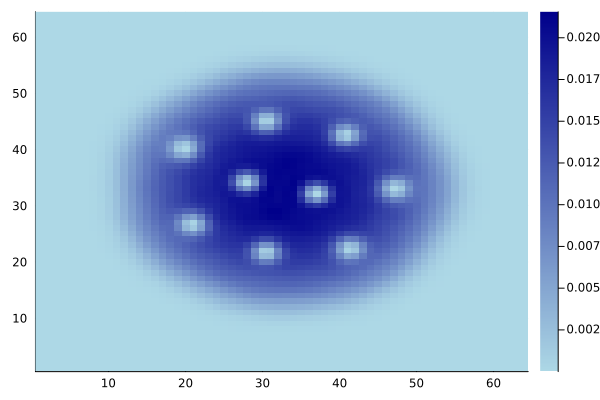

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)